## 이동평균선 전략

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [44]:
stock_list = fdr.StockListing('KOSPI')

stock_list = stock_list.head(100) #코스피에서 100개만 뽑아서 돌려보기

In [64]:
results = []

stock_list = fdr.StockListing('KOSPI').head(100)

#계산 함수들
def calculate_returns(buy_price, highest_price, buy_date, highest_price_date):
    cumulative_return = (highest_price - buy_price) / buy_price * 100
    n_years = (highest_price_date - buy_date).days / 365.25
    cagr = ((highest_price / buy_price) ** (1 / n_years)) - 1

    return cumulative_return, cagr * 100

In [138]:
for Code in stock_list['Code']:
    try:
        stock_data = fdr.DataReader(Code)

        if stock_data.empty:
            continue
            
        # 이동 평균선
        stock_data['MA5'] = stock_data['Close'].rolling(window=5).mean()
        stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()

        stock_data['Signal'] = 0
        stock_data['Signal'][stock_data['MA5'] > stock_data['MA20']] = 1  
        stock_data['Signal'][stock_data['MA5'] < stock_data['MA20']] = -1 

        buy_signals = stock_data[stock_data['Signal'] == 1]

        # 0원인 경우가 있음
        if buy_signals.empty:
            continue  

        buy_price = buy_signals.iloc[0]['Close']

        if buy_price == 0:
            print(f"{Code} 데이터에 문제가 있습니다 (매수 가격이 0)")
            continue

        after_buy_data = stock_data.loc[buy_signals.index[0]:]
        highest_price = after_buy_data['Close'].max()
        highest_price_date = after_buy_data['Close'].idxmax()

        if highest_price == 0:
            print(f"{Code} 데이터에 문제가 있습니다 (최고가가 0)")
            continue

        cumulative_return, cagr = calculate_returns(buy_price, highest_price, buy_signals.index[0], highest_price_date)

        results.append([Code, buy_signals.index[0], buy_price, highest_price, highest_price_date, cumulative_return, cagr])

    except Exception as e:
        print(f"{Code} 데이터를 처리하는 중 오류 발생: {e}")
        continue

323410 데이터를 처리하는 중 오류 발생: float division by zero
443060 데이터를 처리하는 중 오류 발생: float division by zero


In [139]:
for result in results:
    print(f"종목: {result[0]}, 매수일: {result[1].date()}, 매수가: {result[2]}, 최고가: {result[3]}, 매도일: {result[4].date()}, "
          f"누적 수익률: {result[5]:.2f}%, CAGR: {result[6]:.2f}%") #날짜도 찍어보고싶음

종목: 005930, 매수일: 2000-08-17, 매수가: 6440.0, 최고가: 91000, 매도일: 2021-01-11, 누적 수익률: 1313.04%, CAGR: 13.86%
종목: 000660, 매수일: 2000-08-14, 매수가: 387685.0, 최고가: 447555, 매도일: 2000-08-28, 누적 수익률: 15.44%, CAGR: 4137.61%
종목: 373220, 매수일: 2022-03-25, 매수가: 439000.0, 최고가: 624000, 매도일: 2022-11-11, 누적 수익률: 42.14%, CAGR: 74.37%
종목: 207940, 매수일: 2016-12-23, 매수가: 142315.0, 최고가: 1091000, 매도일: 2024-10-21, 누적 수익률: 666.61%, CAGR: 29.72%
종목: 005380, 매수일: 2000-08-02, 매수가: 15300.0, 최고가: 298000, 매도일: 2024-06-27, 누적 수익률: 1847.71%, CAGR: 13.23%
종목: 068270, 매수일: 2005-09-09, 매수가: 3677.0, 최고가: 374621, 매도일: 2020-12-07, 누적 수익률: 10088.22%, CAGR: 35.43%
종목: 005935, 매수일: 2000-08-17, 매수가: 2840.0, 최고가: 81000, 매도일: 2021-01-11, 누적 수익률: 2752.11%, CAGR: 17.85%
종목: 000270, 매수일: 2000-07-26, 매수가: 6940.0, 최고가: 132300, 매도일: 2024-06-19, 누적 수익률: 1806.34%, CAGR: 13.13%
종목: 105560, 매수일: 2008-12-03, 매수가: 28639.0, 최고가: 97200, 매도일: 2024-10-14, 누적 수익률: 239.40%, CAGR: 8.01%
종목: 055550, 매수일: 2001-10-10, 매수가: 10750.0, 최고가: 63537, 매도일: 2007-07-25,

In [140]:
#시각화 함수
def visualize_stock_data(stock_data, buy_date, buy_price, highest_price_date, highest_price, Code):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Close'], label='종가', color='blue')
    plt.plot(stock_data['MA5'], label='MA5', color='orange')
    plt.plot(stock_data['MA20'], label='MA20', color='green')

    plt.scatter(buy_date, buy_price, marker='^', color='red', label='매수 신호', zorder=5)

    plt.scatter(highest_price_date, highest_price, marker='*', color='green', label='최고가', zorder=5)

    plt.title(f"{Code} 종목의 이동평균선 교차 전략")
    plt.xlabel("날짜")
    plt.ylabel("가격")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

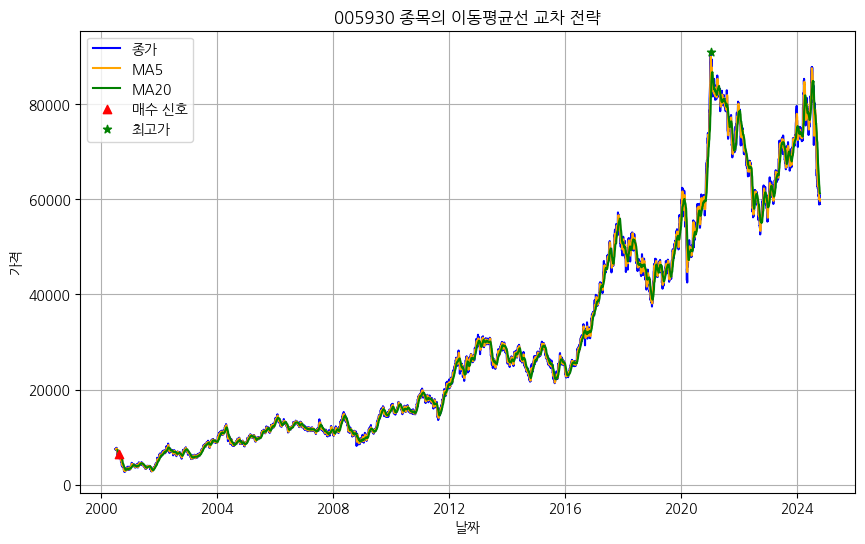

In [152]:
#삼성해보기
stock_data = fdr.DataReader("005930")

stock_data['MA5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()

stock_data['Signal'] = 0
stock_data['Signal'][stock_data['MA5'] > stock_data['MA20']] = 1  
stock_data['Signal'][stock_data['MA5'] < stock_data['MA20']] = -1  

buy_signals = stock_data[stock_data['Signal'] == 1]

if not buy_signals.empty:
    buy_price = buy_signals.iloc[0]['Close']
    buy_date = buy_signals.index[0]

    after_buy_data = stock_data.loc[buy_signals.index[0]:]
    highest_price = after_buy_data['Close'].max()
    highest_price_date = after_buy_data['Close'].idxmax()

    visualize_stock_data(stock_data, buy_date, buy_price, highest_price_date, highest_price, Code)

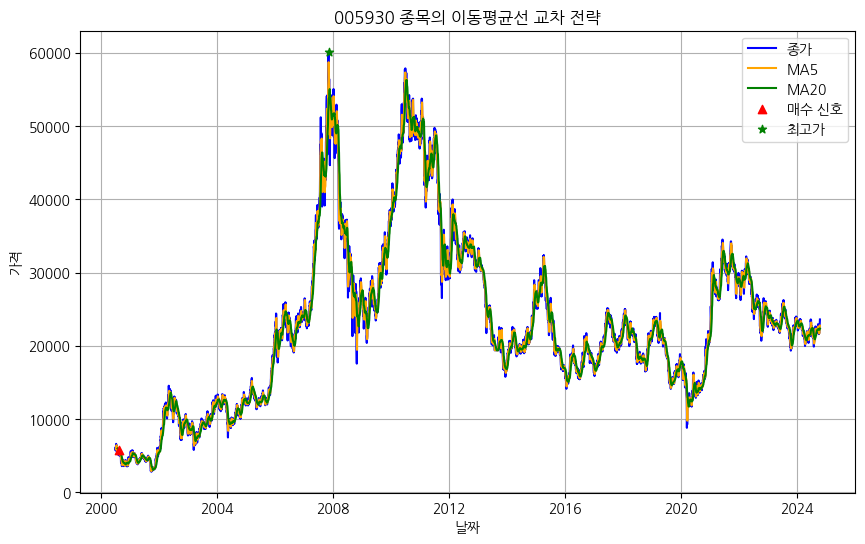

In [154]:
# 대한항공 해보기
stock_data = fdr.DataReader("003490")

stock_data['MA5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()

stock_data['Signal'] = 0
stock_data['Signal'][stock_data['MA5'] > stock_data['MA20']] = 1  
stock_data['Signal'][stock_data['MA5'] < stock_data['MA20']] = -1 

buy_signals = stock_data[stock_data['Signal'] == 1]

if not buy_signals.empty:
    buy_price = buy_signals.iloc[0]['Close']
    buy_date = buy_signals.index[0]

    after_buy_data = stock_data.loc[buy_signals.index[0]:]
    highest_price = after_buy_data['Close'].max()
    highest_price_date = after_buy_data['Close'].idxmax()

    visualize_stock_data(stock_data, buy_date, buy_price, highest_price_date, highest_price, Code)